In [1]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
categories_train = ['comp.graphics', 'comp.sys.ibm.pc.hardware']
train_data = fetch_20newsgroups(subset='train', categories=categories_train)['data']

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def preprocess_data(text):
    text=text.replace('\n',' ')
    letters_only=re.sub('[^a-zA-Z]', ' ', text)
    lower_case=letters_only.lower().split()
    words = [w for w in lower_case if not w in stopwords.words('english')]
    return ' '.join(words)

def preprocess_corpus(data):
    processed_data=[]
    for i in range(len(data)):
        processed_data.append(preprocess_data(data[i]))
    return processed_data

In [7]:
preprocessed_data = preprocess_corpus(train_data)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [83]:
vectorized_data = vectorizer.fit_transform(preprocessed_data)

In [84]:
vectorized_data=np.array(vectorized_data.todense())

In [21]:
n_input_output = vectorized_data.shape[1]
n_hidden = 100

In [102]:
import tensorflow as tf

In [103]:
X = tf.placeholder(shape = [None, n_input_output], dtype = tf.float64)
Y = tf.placeholder(shape = [None, n_input_output], dtype = tf.float64)

In [111]:
W = {
    'h':tf.Variable(tf.random_normal(shape = [n_input_output, n_hidden], dtype = tf.float64), dtype = tf.float64),
    'out':tf.Variable(tf.random_normal(shape = [n_hidden, n_input_output], dtype = tf.float64), dtype = tf.float64)
}

b = {
    'h':tf.Variable(tf.random_normal(shape = [n_hidden], dtype = tf.float64), dtype = tf.float64),
    'out':tf.Variable(tf.random_normal(shape = [n_input_output], dtype = tf.float64), dtype = tf.float64)
}

In [105]:
def model(x):
    h = tf.add(tf.matmul(x, W['h']), b['h'])
    out = tf.add(tf.matmul(h, W['out']), b['out'])
    return out

In [106]:
prediction = model(X)
loss = tf.reduce_mean(tf.square(prediction - Y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [107]:
init = tf.global_variables_initializer()

In [114]:
sess = tf.Session()
sess.run(init)

In [109]:
batch_size = 24
n_iterations = (int)(vectorized_data.shape[0]/batch_size)+1

In [115]:
for epoch in range(50):
    print("Epoch ",epoch)
    for i in range(n_iterations):
        if i < n_iterations-1:
            batch_x = vectorized_data[i*batch_size: (i+1)*batch_size]
        else:
            batch_x = vectorized_data[i*batch_size: vectorized_data.shape[0]]
        sess.run(train_step, feed_dict = { X:batch_x,Y: batch_x})
        if (i+1)%10 == 0:
            print("Iteration ",(i+1),"    ",sess.run(loss, feed_dict = {X: batch_x, Y: batch_x}))
        

Epoch  0
Iteration  10      150.154070525
Iteration  20      131.65245756
Iteration  30      120.490396377
Iteration  40      112.557675423
Epoch  1
Iteration  10      107.299981362
Iteration  20      100.332109635
Iteration  30      99.7135325496
Iteration  40      100.743565995
Epoch  2
Iteration  10      101.477106621
Iteration  20      95.2779158016
Iteration  30      96.3019217264
Iteration  40      99.0501547521
Epoch  3
Iteration  10      100.435698066
Iteration  20      94.1210294025
Iteration  30      95.4587547794
Iteration  40      98.5649509345
Epoch  4
Iteration  10      99.9888406911
Iteration  20      93.6428139347
Iteration  30      95.0503398924
Iteration  40      98.1938517501
Epoch  5
Iteration  10      99.6024743833
Iteration  20      93.3151452907
Iteration  30      94.7323518848
Iteration  40      97.8229811926
Epoch  6
Iteration  10      99.2174865034
Iteration  20      93.0311646005
Iteration  30      94.4386180974
Iteration  40      97.4488091872
Epoch  7
Itera

In [118]:
sess.run(loss, feed_dict = {X: vectorized_data[15:16],Y: vectorized_data[15:16]})

110.14351739797415

In [117]:
categories_test = ['alt.atheism']
test_data = fetch_20newsgroups(subset='test', categories=categories_test)['data']

In [119]:
preprocessed_test_data = preprocess_corpus(test_data)

In [120]:
vectorized_test_data = vectorizer.transform(preprocessed_test_data)

In [121]:
vectorized_test_data = np.array(vectorized_test_data.todense())

In [127]:
loss1 = tf.reduce_mean(tf.square(prediction - Y), axis = 0) 

In [129]:
pred = sess.run(loss1, feed_dict = {X: vectorized_test_data,Y: vectorized_test_data})

In [131]:
pred1 = sess.run(loss1, feed_dict = {X: vectorized_data,Y: vectorized_data})

In [125]:
sess.run(loss, feed_dict = {X: vectorized_test_data[1:2],Y: vectorized_test_data[1:2]})

90.907914673942955

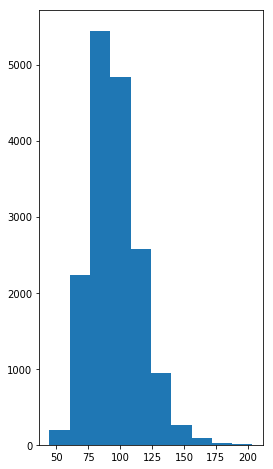

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,8))
plt.hist(pred)
plt.show()

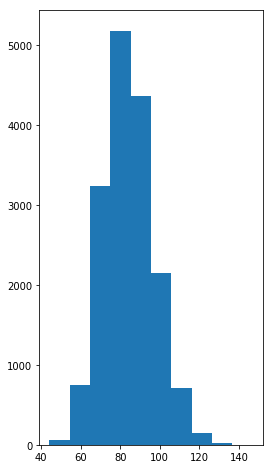

In [132]:
plt.figure(figsize = (4,8))
plt.hist(pred1)
plt.show()

In [150]:
## here I decide 90 as the threshold limit
result =[]
for i in range(len(pred)):
    if pred[i]>=90:
        result.append(-1)
    else:
        result.append(1)

In [151]:
np.sum(result)

-2727

In [152]:
result1 =[]
for i in range(len(pred1)):
    if pred1[i]>=90:
        result1.append(-1)
    else:
        result1.append(1)

In [153]:
np.sum(result1)

6387

In [146]:
len(pred1)

16623